In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# leer el dataset
data= pd.read_csv('Car details v3.xls')
print(data.columns)

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


In [10]:
# Imprimir algunos registros
data.head(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [13]:
#Eliminamos columnas innnecesarias
data = data.drop(['name','seats'], axis=1)

In [18]:
# Verificamos datos nulos
datosNulos= data.isnull().sum()
print(datosNulos)

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
dtype: int64


In [21]:
# Verificamos el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           8128 non-null   int64 
 1   selling_price  8128 non-null   int64 
 2   km_driven      8128 non-null   int64 
 3   fuel           8128 non-null   object
 4   seller_type    8128 non-null   object
 5   transmission   8128 non-null   object
 6   owner          8128 non-null   object
 7   mileage        7907 non-null   object
 8   engine         7907 non-null   object
 9   max_power      7913 non-null   object
 10  torque         7906 non-null   object
dtypes: int64(3), object(8)
memory usage: 698.6+ KB


In [24]:
# Imputamos datos nulos con la moda si es categorica(object)
# eliminamos letras y convertimos a tipo numerico
# Imputamos datos nulos con la media si es numerico

datosA=dict(datosNulos)

for columna,valornulo in datosA.items():
    
    if data[columna].dtype == 'object':

        data[columna].fillna(data[columna].mode()[0], inplace=True)

        if columna in data:
            tienecaracteres=data[columna].str.contains(r'\D+', '', regex=True).any()
            tienenumeros=data[columna].str.contains(r'\d+', '', regex=True).any()
            if tienecaracteres and tienenumeros:
                data[columna] = data[columna].str.replace(r'\D+', '', regex=True)
                data[columna] = pd.to_numeric(data[columna], errors='coerce')
    else:
        data[columna].fillna(data[columna].mean(), inplace=True)

In [27]:
# Verificar eliminación de letras
# Verificar transformación a tipo numerico
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        8128 non-null   int64  
 8   engine         8128 non-null   int64  
 9   max_power      8127 non-null   float64
 10  torque         8128 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 698.6+ KB


In [30]:
# Verificarion valores Nulos
print(data.isnull().sum())

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        1
torque           0
dtype: int64


In [33]:
# Inputamos el valor nulo con la media
data['max_power'].fillna(data['max_power'].mean(), inplace=True)

In [35]:
print(data.isnull().sum())

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
dtype: int64


In [38]:
# Utilizamos One Hot Encoding para tratar variables categoricas
data = pd.get_dummies(data, columns=['seller_type','owner','fuel','transmission'], drop_first=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8128 non-null   int64  
 1   selling_price                 8128 non-null   int64  
 2   km_driven                     8128 non-null   int64  
 3   mileage                       8128 non-null   int64  
 4   engine                        8128 non-null   int64  
 5   max_power                     8128 non-null   float64
 6   torque                        8128 non-null   int64  
 7   seller_type_Individual        8128 non-null   bool   
 8   seller_type_Trustmark Dealer  8128 non-null   bool   
 9   owner_Fourth & Above Owner    8128 non-null   bool   
 10  owner_Second Owner            8128 non-null   bool   
 11  owner_Test Drive Car          8128 non-null   bool   
 12  owner_Third Owner             8128 non-null   bool   
 13  fue

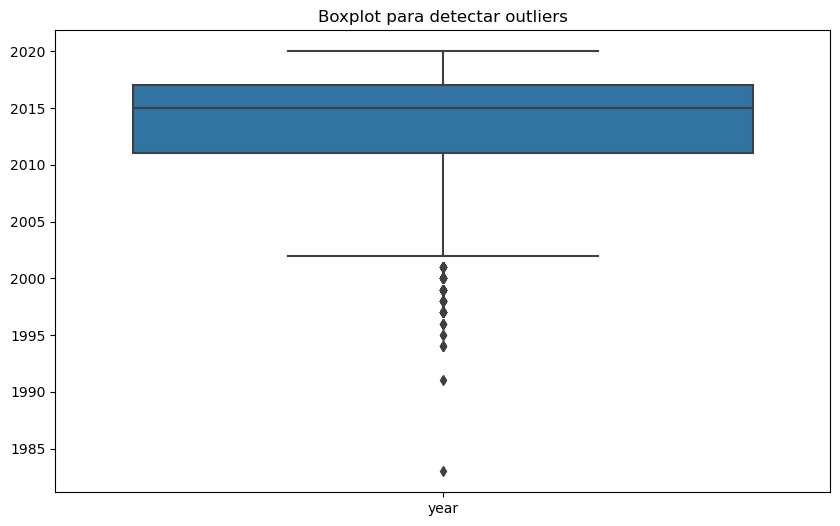

In [48]:
# Verificamos valores atipicos 
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, :1])
plt.title('Boxplot para detectar outliers')
plt.show()

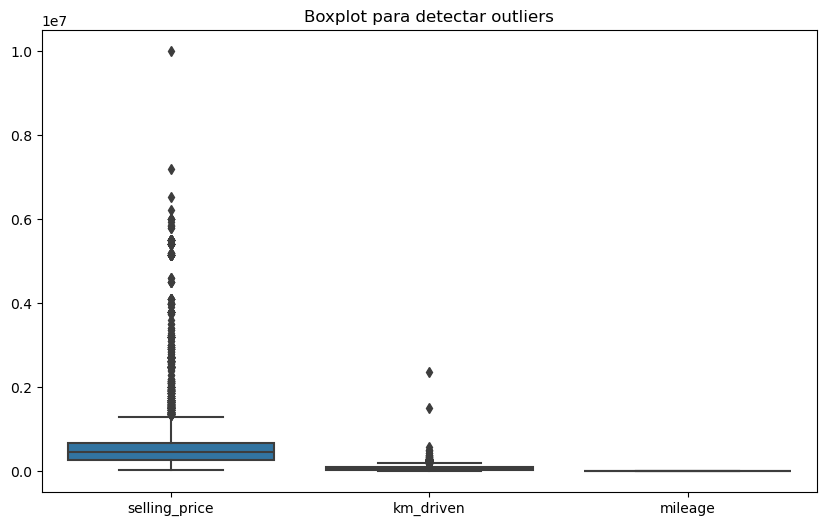

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 1:4])
plt.title('Boxplot para detectar outliers')
plt.show()

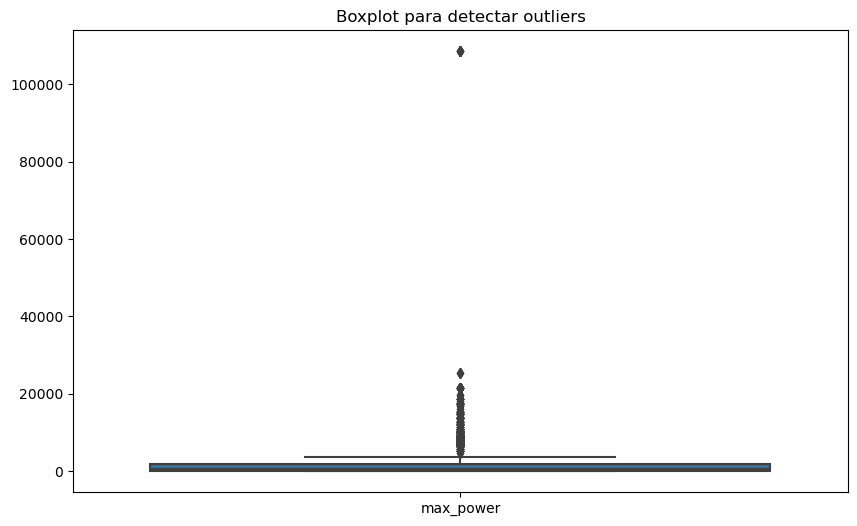

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 5:6])
plt.title('Boxplot para detectar outliers')
plt.show()

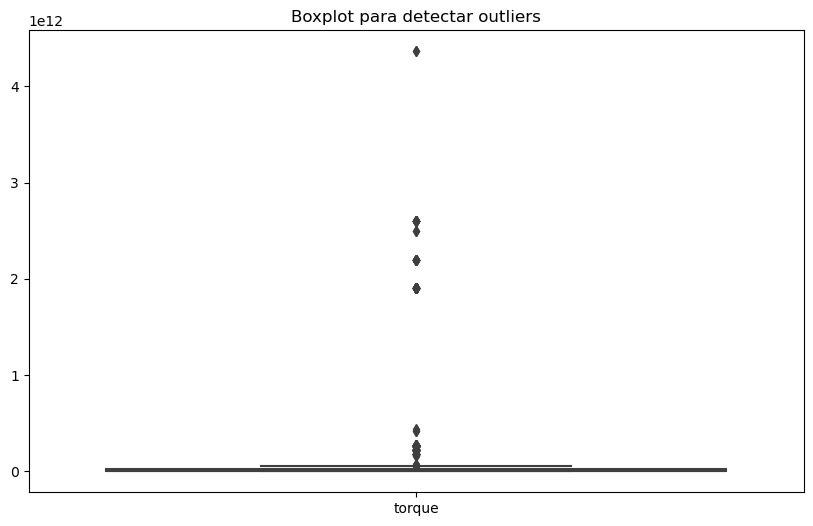

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 6:7])
plt.title('Boxplot para detectar outliers')
plt.show()

In [108]:
#tratamos valores atipicos
data['year'] = np.log1p(data['year'])
data['selling_price'] = np.log1p(data['selling_price'])  # log1p maneja bien valores cero
data['max_power'] = np.log1p(data['max_power'])
data['engine'] = np.log1p(data['engine'])
data['torque'] = np.log1p(data['torque'])
data['km_driven'] = np.log1p(data['km_driven'])

In [110]:
# escalamos las variables para asegurar escala similar
scaler = StandardScaler()
data_scaledf = scaler.fit_transform(data)
data_scaled= pd.DataFrame(data_scaledf, columns=data.columns)

In [112]:
# Seleccionamos variable objetivo
x= data_scaled.drop(columns=['selling_price'])
y= data_scaled['selling_price']

In [114]:
# Seleccionamos las mejores caraxteristicas
selector= SelectKBest(score_func=f_regression, k=5)

x_new= selector.fit_transform(x, y)

mask= selector.get_support()
selected_features= x.columns[mask]

print("Caracteristicas seleccionadas")
print(selected_features)

Caracteristicas seleccionadas
Index(['year', 'km_driven', 'engine', 'torque', 'transmission_Manual'], dtype='object')


In [116]:
# Dividimos los datos en train y test
x_train, x_test, y_train, y_test= train_test_split(x_new, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento: ", x_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba: ", x_test.shape, y_test.shape)

Tamaño del conjunto de entrenamiento:  (6502, 5) (6502,)
Tamaño del conjunto de prueba:  (1626, 5) (1626,)


In [128]:
# Creamos el modelo con hiperparametros
model= LinearRegression()

param_distributions={
    'fit_intercept': [True, False],
    'n_jobs': [-1]
}

random_search= RandomizedSearchCV(estimator= model, param_distributions=param_distributions, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

In [130]:
random_search.fit(x_train, y_train)

print("Mejores hiperparametros: ", random_search.best_params_)


Mejores hiperparametros:  {'n_jobs': -1, 'fit_intercept': False}


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [132]:
# Verificamos resultados de las metricas
best_model= random_search.best_estimator_

y_pred= best_model.predict(x_test)

mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 0.19385034703822154
Raíz del error cuadrático medio (RMSE): 0.4402843933620877
Error absoluto medio (MAE): 0.34380849190519136
Coeficiente de determinación (R^2): 0.8007812064652259


# Resultados de las Metricas
## 1.Error Cuadrático Medio (MSE):

Valor: 0.1939
Interpretación: El MSE mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo. Dado que este valor es bajo, indica que el modelo está prediciendo con precisión.

## 2. Raíz del Error Cuadrático Medio (RMSE):

Valor: 0.4403
Interpretación: RMSE es la raíz cuadrada del MSE y proporciona una medida de error en las mismas unidades que la variable de respuesta. Un RMSE de 0.4403 indica que, en promedio, las predicciones del modelo están a 0.44 unidades del valor real, lo cual es bastante aceptable dependiendo del rango de los datos que se han trabajado.

## 3. Error Absoluto Medio (MAE):

Valor: 0.3438
Interpretación: El MAE mide el promedio de los errores absolutos entre las predicciones y los valores reales. Este valor también es bastante bajo, lo que significa que, en promedio, las predicciones se desvían de los valores reales en aproximadamente 0.34 unidades.

## 4. Coeficiente de Determinación (R²):

Valor: 0.8008
Interpretación: R² indica la proporción de la variabilidad total de la variable de respuesta que es explicada por el modelo. Un R² de 0.8008 significa que aproximadamente el 80.08% de la variabilidad en los datos de salida se puede explicar con el modelo. Esto es un excelente indicador de la efectividad del modelo, ya que un valor cercano a 1.0 indica un buen ajuste.

In [134]:
# Realizamos validacion cruzada 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(best_model, x_new, y, scoring='neg_mean_squared_error', cv=kf)

mse_promedio = -mse_scores.mean()
print(f"MSE promedio usando validación cruzada: {mse_promedio}")

MSE promedio usando validación cruzada: 0.19679643969519905


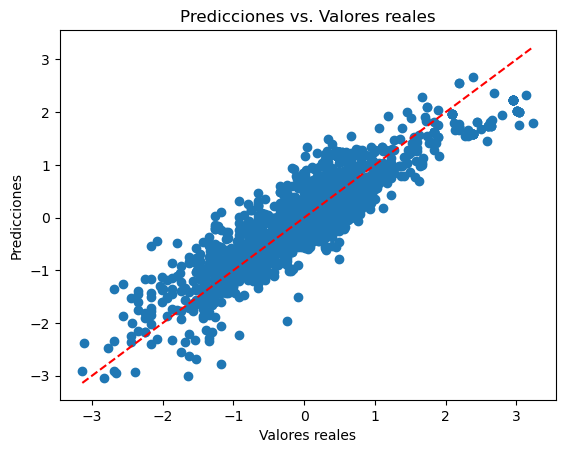

In [136]:
# Camparamos las predicciones con valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
